<a href="https://colab.research.google.com/github/JohannBlaesche/PStr/blob/master/Pstr_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
cd /content/drive/MyDrive/PStr2/

/content/drive/MyDrive/PStr2


In [39]:
ls

train_delay/  weather/


In [40]:
pip install river

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


**Explorative Data Analysis**

*TODO:*


*   collect weather data
*   find intersections of available weather- and train-delay-data
*   collect data of Belgian holidays
*   optional: consider data of Belgian strike days in the past 



In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("Data_raw_punctuality_202205.csv")
df

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DELAY_ARR,DELAY_DEP,CIRC_TYP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
0,01MAY2022,13000,EXTRA,SNCB/NMBS,210,NaN,51,NaN,6:34:40,NaN,...,NaN,40.0,1,NaN,BRUGGE,NaN,NaN,01MAY2022,NaN,01MAY2022
1,01MAY2022,13000,EXTRA,SNCB/NMBS,212,D,51,6:37:46,6:37:46,6:36:00,...,106.0,106.0,1,NaN,BRUGGE-SINT-PIETERS,51,01MAY2022,01MAY2022,01MAY2022,01MAY2022
2,01MAY2022,13000,EXTRA,SNCB/NMBS,540,=,51B,6:47:53,6:49:09,6:49:00,...,-66.0,9.0,1,NaN,HEIST,51B,01MAY2022,01MAY2022,01MAY2022,01MAY2022
3,01MAY2022,13000,EXTRA,SNCB/NMBS,337,=,51B,6:50:53,6:51:51,6:52:00,...,-66.0,-8.0,1,NaN,DUINBERGEN,51B,01MAY2022,01MAY2022,01MAY2022,01MAY2022
4,01MAY2022,13000,EXTRA,SNCB/NMBS,642,NaN,NaN,6:54:15,NaN,6:55:00,...,-44.0,NaN,1,NaN,KNOKKE,51B,01MAY2022,NaN,01MAY2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906294,31MAY2022,17854,EXTRA,SNCB/NMBS,1062,NaN,125,23:50:26,23:50:26,23:50:00,...,26.0,26.0,1,NaN,SCLAIGNEAUX,125,31MAY2022,31MAY2022,31MAY2022,31MAY2022
1906295,31MAY2022,17854,EXTRA,SNCB/NMBS,894,NaN,125,23:52:08,23:52:08,23:51:00,...,68.0,68.0,1,NaN,NAMECHE,125,31MAY2022,31MAY2022,31MAY2022,31MAY2022
1906296,31MAY2022,17854,EXTRA,SNCB/NMBS,269,NaN,125,23:53:48,23:53:48,23:53:00,...,48.0,48.0,1,NaN,MARCHE-LES-DAMES-MARCHANDISES,125,31MAY2022,31MAY2022,31MAY2022,31MAY2022
1906297,31MAY2022,17854,EXTRA,SNCB/NMBS,789,NaN,125,23:53:50,23:53:50,23:53:00,...,50.0,50.0,1,NaN,MARCHE-LES-DAMES,125,31MAY2022,31MAY2022,31MAY2022,31MAY2022


In [25]:
df1 = df.drop(["THOP1_COD", "RELATION_DIRECTION"], axis=1).dropna().loc[df["DELAY_DEP"]>0].drop_duplicates(subset=["TRAIN_NO"],keep="last").nlargest(20, "DELAY_DEP")
df1

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,DELAY_ARR,DELAY_DEP,CIRC_TYP,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
1902890,31MAY2022,9152,EURST,EUROSTARFR,376,12,1:03:08,1:03:08,22:14:18,22:14:18,10130.0,10130.0,1,ESSEN,12,31MAY2022,31MAY2022,01JUN2022,01JUN2022
713610,11MAY2022,17208,EXTRA,SNCB/NMBS,553,36,20:25:37,20:25:37,17:38:00,17:38:00,10057.0,10057.0,1,HERENT,36,11MAY2022,11MAY2022,11MAY2022,11MAY2022
1577946,25MAY2022,9389,THAL,THI-FACT,504,1,0:07:12,0:07:12,22:10:00,22:10:00,7032.0,7032.0,1,HALLE,1,25MAY2022,25MAY2022,26MAY2022,26MAY2022
1893988,31MAY2022,9135,EURST,EUROSTARFR,504,1,14:52:07,14:52:07,13:04:00,13:04:00,6487.0,6487.0,1,HALLE,1,31MAY2022,31MAY2022,31MAY2022,31MAY2022
1902943,31MAY2022,9148,EURST,EUROSTARFR,504,1,21:45:59,21:45:59,19:59:00,19:59:00,6419.0,6419.0,1,HALLE,1,31MAY2022,31MAY2022,31MAY2022,31MAY2022
1894055,31MAY2022,9142,EURST,EUROSTARFR,504,1,19:40:47,19:40:47,17:56:00,17:56:00,6287.0,6287.0,1,HALLE,1,31MAY2022,31MAY2022,31MAY2022,31MAY2022
1895098,31MAY2022,9116,EURST,EUROSTARFR,504,1,13:40:02,13:40:02,11:57:00,11:57:00,6182.0,6182.0,1,HALLE,1,31MAY2022,31MAY2022,31MAY2022,31MAY2022
1278620,20MAY2022,9603,IZY,THI-FACT,504,1,15:38:25,15:38:25,14:26:00,14:26:00,4345.0,4345.0,1,HALLE,1,20MAY2022,20MAY2022,20MAY2022,20MAY2022
1860830,30MAY2022,19941,IC 19-2,SNCB/NMBS,427,94,16:33:21,16:34:26,15:32:00,15:32:00,3681.0,3746.0,1,FROYENNES,94,30MAY2022,30MAY2022,30MAY2022,30MAY2022
1017847,16MAY2022,9440,THAL,THI-FACT,504,1,14:22:15,14:22:15,13:21:00,13:21:00,3675.0,3675.0,1,HALLE,1,16MAY2022,16MAY2022,16MAY2022,16MAY2022


<Axes: xlabel='TRAIN_NO'>

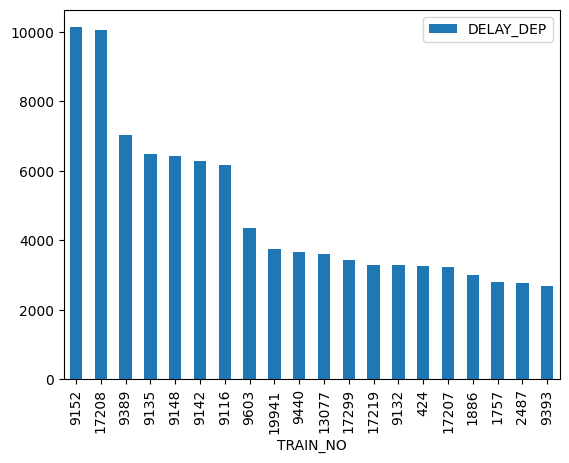

In [26]:
df1.plot(x="TRAIN_NO", y="DELAY_DEP", kind="bar")

In [31]:
print("mean delay in minutes: " + str(df1["DELAY_DEP"].mean()/60))

mean delay in minutes: 79.79083333333332


<Axes: ylabel='Frequency'>

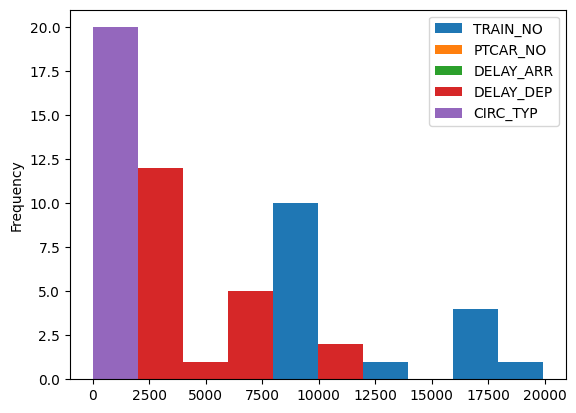

In [32]:
df2 = df1.sort_values(by="DELAY_DEP")

df1.plot(x="RELATION", kind="hist")